In [1]:
!pip install piml

### import library

In [1]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.metrics import *

### import data

## Taiwan Credit default data

In [2]:
import piml
piml.__version__

'0.5.0'

## initiate piml experiment

In [3]:
from piml import Experiment
exp = Experiment()

### load data

In [4]:
exp.data_loader("TaiwanCredit")

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,FlagDefault
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,0.0,0.0,3.592621,3.491782,2.838849,0.000000,0.000000,0.000000,0.000000,2.838849,0.000000,0.000000,0.000000,0.000000,1.0
1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,3.428621,3.237041,3.428621,3.514946,3.538574,3.513484,0.000000,3.000434,3.000434,3.000434,0.000000,3.301247,1.0
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,4.465977,4.146996,4.132260,4.156307,4.174612,4.191731,3.181558,3.176381,3.000434,3.000434,3.000434,3.699057,0.0
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,4.672015,4.683353,4.692776,4.452016,4.461799,4.470528,3.301247,3.305351,3.079543,3.041787,3.029384,3.000434,0.0
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,3.935406,3.753660,4.554319,4.320997,4.282101,4.281760,3.301247,4.564453,4.000043,3.954291,2.838849,2.832509,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,5.276345,5.285143,5.318827,4.944507,4.494683,4.203604,3.929470,4.301052,3.699317,3.484015,3.699057,3.000434,0.0
29996,150000.0,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,3.226342,3.262214,3.544440,3.953276,3.715251,0.000000,3.264345,3.547405,3.954194,2.113943,0.000000,0.000000,0.0
29997,30000.0,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3.552181,3.525951,3.440752,4.319710,4.313509,4.286861,0.000000,0.000000,4.342442,3.623353,3.301247,3.491502,1.0
29998,80000.0,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,-3.216430,4.894205,4.882553,4.722428,4.073938,4.689708,4.933998,3.532754,3.071514,3.284882,4.723989,3.256477,1.0


In [5]:
#PAY_1: repayment at sept 2005, (delay in payment) PAY_2 : August 2005,..PAY_6 April 2005

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

### data summary

In [6]:
exp.data_summary(feature_exclude=["SEX",  "MARRIAGE"])

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='Data Shape:(30000, 24)')

### exploratory data analysis

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

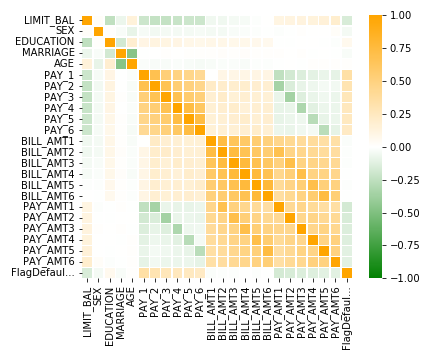

In [7]:
exp.eda(show = 'multivariate', figsize = (6,5))

## Data Preparation 

In [8]:
exp.data_prepare(target='FlagDefault', task_type='classification', test_ratio=0.3, random_state=0)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,Config,Value
0,Excluded columns,"[SEX, MARRIAGE]"
1,Target variable,FlagDefault
2,Sample weight,None
3,Task type,Classification
4,Split method,Random
5,Test ratio,0.3
6,Random state,0
7,Train test energy distance,0.000227


## Feature selection
using permutation based feature importance from a light gbm model

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

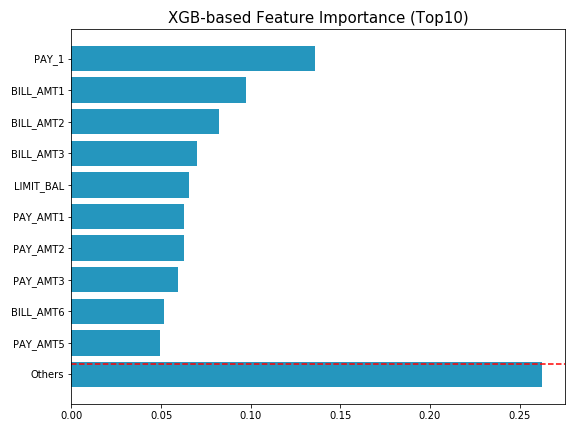

In [9]:
exp.feature_select(method = 'pfi',threshold = 0.8)

### Extract training data from pipeline 
to tune HP of XGB model to be later fit

In [10]:
train = exp.get_data(train = True)
train_x = train[0]
train_y = train[1]
test = exp.get_data(test = True)
test_x = test[0]
test_y = test[1]


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [11]:
train_x.shape

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

(21000, 12)

### Tuning and training model

In [12]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[3,4,5,6], 'learning_rate':[0.1,0.05,0.2,0.15]}
xgb = XGBClassifier(n_estimators = 300)
clf = GridSearchCV(xgb, parameters,scoring = 'neg_log_loss')
clf.fit(train_x,train_y)


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_c

In [13]:
clf.best_params_

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

{'learning_rate': 0.05, 'max_depth': 3}

In [14]:
xgbtuned = XGBClassifier(n_estimators = 300,max_depth = 3,learning_rate=0.05, random_state = 0)
xgbtuned.fit(train_x,train_y)



HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

### get reference well predicted and badly predicted point in test data

In [15]:
residtest = test_y.T - xgbtuned.predict_proba(test_x)[:,1]

residtest.shape
absresidtest = np.abs(residtest)
idx = np.arange(test_y.shape[0])
test_bad_index = idx[residtest[0,:]==np.max(residtest)]
test_good_index = idx[absresidtest[0,:]==np.min(absresidtest)]
print(test_bad_index,test_good_index)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

[2957] [1453]


### get reference well predicted and badly predicted point in train data

In [16]:
residtrain = train_y.T-xgbtuned.predict_proba(train_x)[:,1]
absresidtrain = np.abs(residtrain)
idx = np.arange(train_y.shape[0])
train_bad_index = idx[residtrain[0,:]==np.max(residtrain)]
train_good_index = idx[absresidtrain[0,:]==np.min(absresidtrain)]
print(train_bad_index,train_good_index)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

[10479] [2544]


In [17]:
xgbtuned.predict_proba(train_x)[10479,1]

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

0.03310827

In [18]:
np.log(0.038/(1-0.038))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

-3.231428290939321

## Training models in piml
note that XGB is fastest and EBM is slowest. 

In [19]:
from piml.models import GAMINetClassifier, ExplainableBoostingClassifier
import time 
models = {
          
          'XGB': XGBClassifier(max_depth = 3, learning_rate = 0.05,n_estimators = 300,random_state=0),
          'GAMI-NET': GAMINetClassifier(interact_num=10, loss_threshold=0.01,  
                        subnet_size_main_effect=[20], 
                        subnet_size_interaction=[20,20], random_state = 0),
          'EBM': ExplainableBoostingClassifier(interactions=10, random_state=0)
         }

for key,model in models.items():
    print (key)
    start = time.time()
    exp.model_train(model = model, name = key)
    end = time.time()
    print(end - start)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

XGB
1.6460845470428467
GAMI-NET
32.61966681480408
EBM
8.272024154663086


## Model performance

In [36]:
exp.model_diagnose(model='GAMI-NET', show='accuracy_table')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.8188,0.7782,0.3573,0.6805,0.4686
Test,0.8272,0.7751,0.3649,0.6867,0.4766
Gap,0.0085,-0.0031,0.0076,0.0063,0.0080


In [37]:
exp.model_diagnose(model='XGB', show='accuracy_table')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.8229,0.8068,0.3575,0.7049,0.4744
Test,0.8277,0.7778,0.3536,0.6979,0.4694
Gap,0.0048,-0.0290,-0.0039,-0.0070,-0.0050


In [38]:
exp.model_diagnose(model='EBM', show='accuracy_table')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.8215,0.7897,0.3473,0.7048,0.4653
Test,0.8261,0.7767,0.3428,0.6963,0.4594
Gap,0.0046,-0.0130,-0.0045,-0.0085,-0.0059


## model explainability - global - post hoc

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

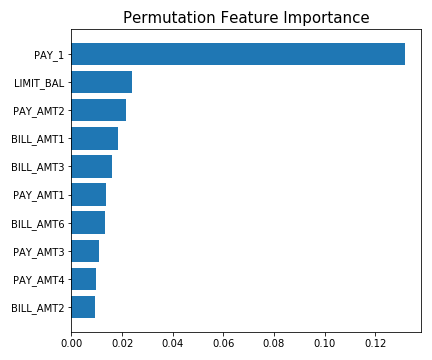

In [39]:
exp.model_explain(model='XGB', show='pfi', uni_feature='PAY_1', figsize=(6, 5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

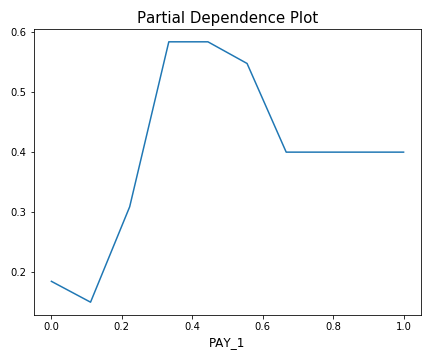

In [40]:
exp.model_explain(model='XGB', show='pdp', uni_feature='PAY_1', figsize=(6, 5))## add another, preferably showing some unexpected pattern

In [41]:
exp.model_explain()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

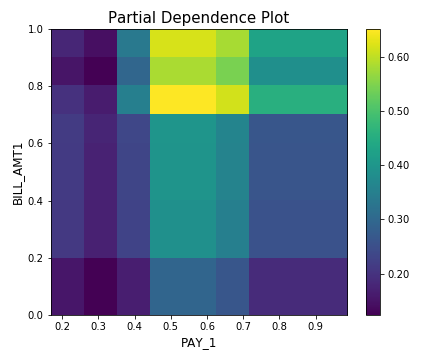

In [43]:
exp.model_explain(model='XGB', show='pdp', bi_features=['PAY_1', 'BILL_AMT1'], figsize=(6, 5), sample_size=5000)

## model explainability local - post-hoc

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

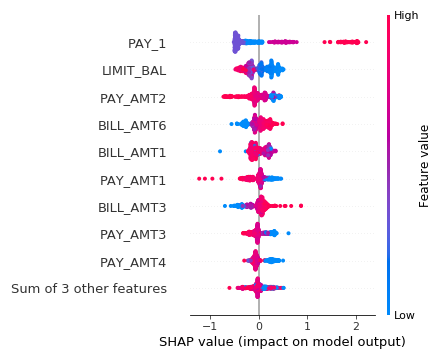

In [44]:
exp.model_explain(model='XGB', show='shap_summary', figsize=(6, 5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

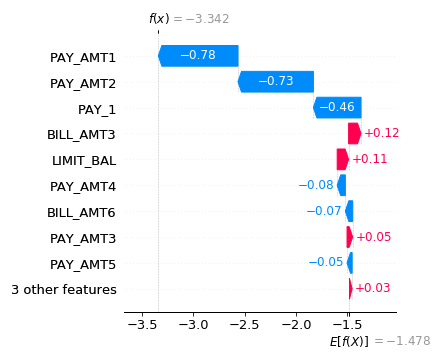

In [45]:
## bad,good [10479] [1433]
exp.model_explain(model='XGB', show='shap_waterfall', figsize=(6, 5), sample_id =1433)

## Inherent interpretation - global

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

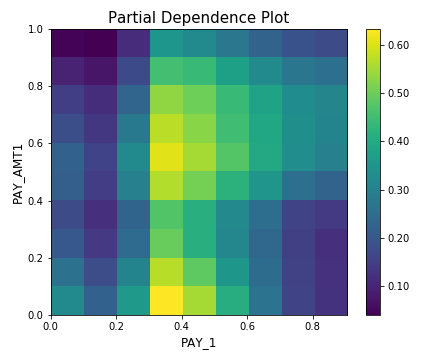

In [46]:
exp.model_explain(model='GAMI-NET', show='pdp', bi_features=['PAY_1','PAY_AMT1'], figsize=(6, 5), sample_size = 2000)
### PAY_AMT1 does not have any effect so the pdp is combination of PAY_! and their interaction effect

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

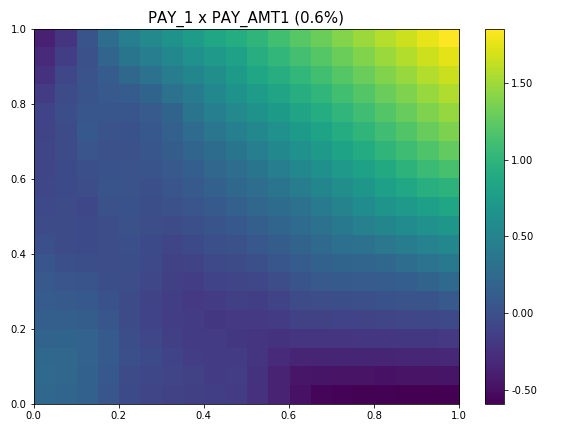

In [49]:
exp.model_interpret(model='GAMI-NET', show='global_effect_plot', bi_features = ['PAY_1', 'PAY_AMT1'])

### pdp for EBM vs GAMI-NET shows the nature of the model. 
EBM is estimating effects as a series of step functions due to underlying tree based structure
GAMI-NET due to its RELU activation is estimating it as piecewise linear function

## Model Performance and over-fitting

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

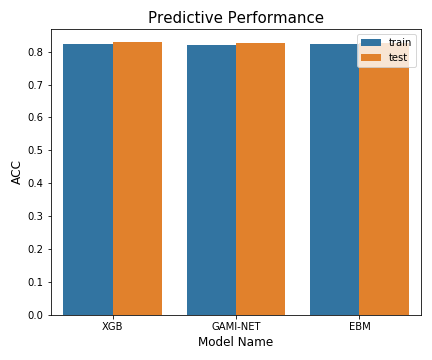

In [52]:
exp.model_compare(models=['XGB', 'GAMI-NET', 'EBM'], show='accuracy_plot', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

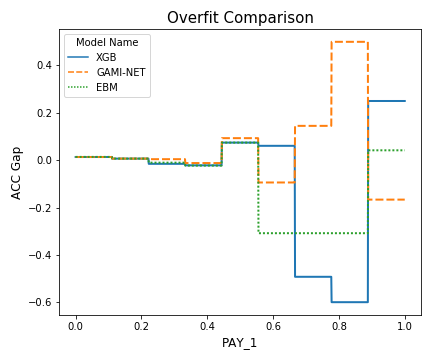

In [55]:
exp.model_compare(models=['XGB', 'GAMI-NET', 'EBM'], show='overfit', slice_feature = 'PAY_1', figsize=(6, 5), metric = 'ACC')

In [56]:
ind = 1*((train_x[:,0]>0.65)&(train_x[:,0]<0.85))
np.sum(ind)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

33

In [57]:
ind = 1*((test_x[:,0]>0.65)&(test_x[:,0]<0.85))
np.sum(ind)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

4

In [58]:
### low number of obs in high Pay_1. hence hard to conclude over-fitting

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

## Reliability Diagram measuring bias in estimated probabilities

 * callibrate predicted probabilities
 * compute brier score (lower is better)
 * bin callibrated probabilities
 * for each bin get observed frequency and mean predicted callibrated probability
 * plot mean prob vs obs freq

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

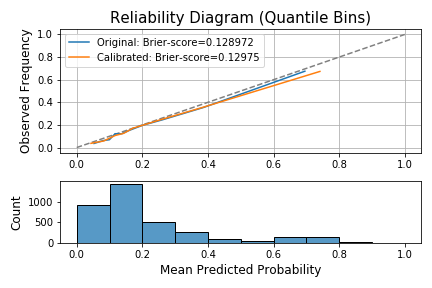

In [59]:
exp.model_diagnose(model='XGB',show='reliability_perf', figsize=(6, 4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

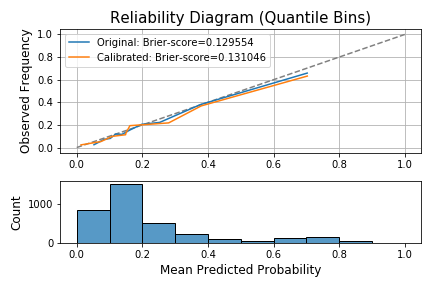

In [60]:
exp.model_diagnose(model='EBM',show='reliability_perf', figsize=(6, 4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

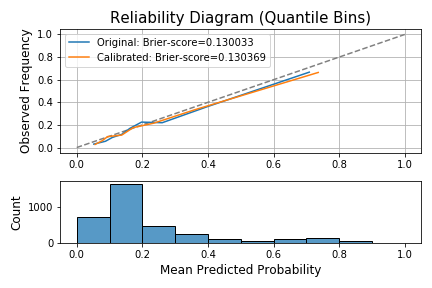

In [61]:
exp.model_diagnose(model='GAMI-NET',show='reliability_perf', figsize=(6, 4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

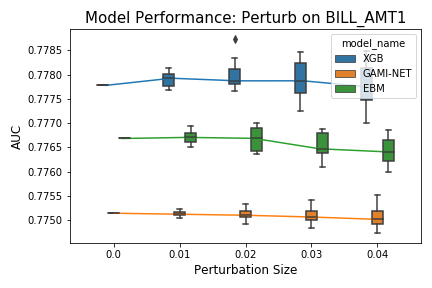

In [62]:
exp.model_compare(models=['XGB', 'GAMI-NET', 'EBM'],show='robustness_perf', figsize=(6, 4), perturb_size = 0.01, perturb_features = ['BILL_AMT1'])

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

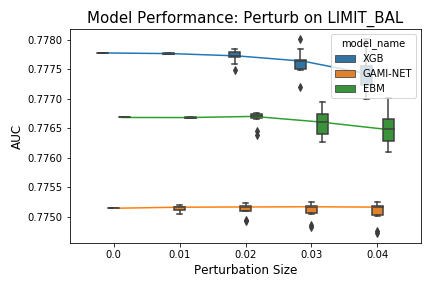

In [63]:
exp.model_compare(models=['XGB', 'GAMI-NET', 'EBM'],show='robustness_perf', figsize=(6, 4), perturb_size = 0.01, perturb_features = ['LIMIT_BAL'])

### faireness of models assessed wrt sex and marriage

In [64]:
exp.model_fairness_compare()
## sex : 2 is female
## marriage 1 - married, 2-single,3-others

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>